In [1]:
import pandas as pd

In [7]:
df_train = pd.read_csv('train.csv')

In [8]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.shape

(891, 12)

In [12]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
survived = df_train[df_train['Survived']==1]

In [19]:
survived.shape

(342, 12)

In [20]:
died = df_train[df_train['Survived']==0]

In [21]:
died.shape

(549, 12)

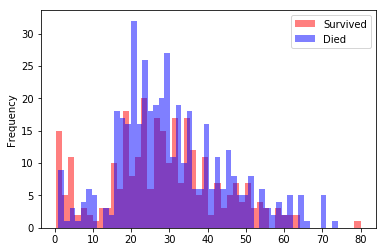

In [23]:
import matplotlib.pyplot as plt
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

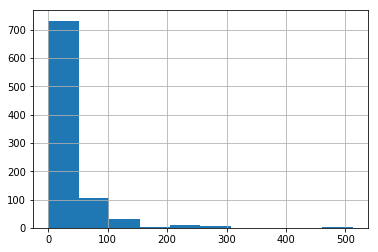

In [25]:
df_train.Fare.hist()

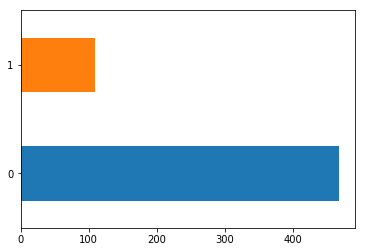

In [26]:
    male = df_train[df_train.Sex=='male'].Survived.value_counts().plot(kind='barh')

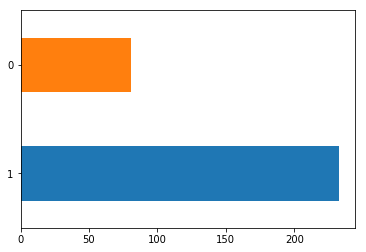

In [27]:
    male = df_train[df_train.Sex=='female'].Survived.value_counts().plot(kind='barh')

In [28]:
df_test = pd.read_csv('test.csv')

In [30]:
df_test.shape

(418, 11)

In [31]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
df_train_test_data = [df_train, df_test]

In [34]:
def transform_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [35]:
cut_ages = [-1,0,18,100]
age_names = ["Missing","Child","Adult"]

In [37]:
df_train = transform_age(df_train,cut_ages,age_names)
df_test = transform_age(df_test,cut_ages,age_names)

In [38]:
cut_ages = [-1,0, 5, 12, 18, 35, 60, 100]
age_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

In [39]:
df_train = transform_age(df_train,cut_ages,age_names)
df_test = transform_age(df_test,cut_ages,age_names)

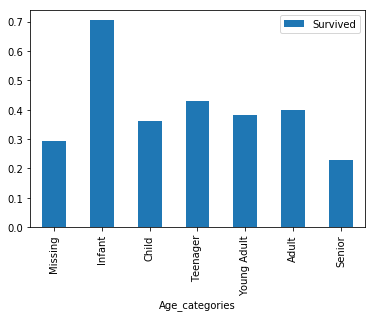

In [41]:
age_cat_pivot = df_train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [43]:
column_name = "Pclass"
df = df_train
dummies = pd.get_dummies(df[column_name],prefix=column_name)
dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [45]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
df_train = create_dummies(df_train,"Pclass")
df_test = create_dummies(df_test,"Pclass")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1


In [46]:
df_train = create_dummies(df_train,"Sex")
df_train = create_dummies(df_train,"Age_categories")
df_test = create_dummies(df_test,"Sex")
df_test = create_dummies(df_test,"Age_categories")

In [47]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [48]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression(solver='lbfgs')

In [67]:
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(df_train[columns], df_train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
lr.decision_function(df_train[columns])

array([-2.14323299,  2.06085883,  0.34486133,  2.06085883, -2.14323299,
       -2.14323299, -0.4272355 , -2.14323299,  0.34486133,  1.38451112,
        0.34486133,  2.06085883, -2.14323299, -2.14323299,  0.34486133,
        1.38451112, -2.14323299, -1.10358321,  0.34486133,  0.34486133,
       -1.10358321, -1.10358321,  0.34486133, -0.4272355 ,  0.34486133,
        0.34486133, -2.14323299, -0.4272355 ,  0.34486133, -2.14323299,
       -0.4272355 ,  2.06085883,  0.34486133, -1.10358321, -0.4272355 ,
       -0.4272355 , -2.14323299, -2.14323299,  0.34486133,  0.34486133,
        0.34486133,  1.38451112, -2.14323299,  1.38451112,  0.34486133,
       -2.14323299, -2.14323299,  0.34486133, -2.14323299,  0.34486133,
       -2.14323299, -2.14323299,  2.06085883,  1.38451112, -0.4272355 ,
       -0.4272355 ,  1.38451112, -2.14323299,  1.38451112, -2.14323299,
       -2.14323299,  2.06085883, -0.4272355 , -2.14323299, -0.4272355 ,
       -2.14323299,  1.38451112, -2.14323299,  0.34486133, -2.14

In [68]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(df_train[columns], df_train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
from sklearn.model_selection import train_test_split

columns = ['Pclass_2', 'Pclass_3', 'Sex_male']

all_X = df_train[columns]
all_y = df_train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2,random_state=0)

In [70]:
holdout = df_test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = df_train[columns]
all_y = df_train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2,random_state=0)

In [71]:
train_X.shape

(712, 12)

In [72]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [73]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
accuracy

0.8100558659217877

In [74]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,96,14
Died,20,49


In [76]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

0.8024670865963002

In [77]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

In [78]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,1,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,1,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,1,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,1,0,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,1,0,0,0,0,0,1,0,0


In [79]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])
holdout_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv('titanic_submission.csv', index=False)